In [38]:
#https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f

import pandas as pd
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

df = pd.read_csv(".\\csvs\\2018trans.csv")
df.head()

,name,category
0,MCDONALD'S #2445,Restaurants
1,CORNER KITCHEN,Restaurants
2,JOHN JUAN BURGER & BURRIT,Restaurants
3,HEART & CROWN BYWARD M,Restaurants
4,UBER TRIP COTAA HELP.UB,Transportation


In [39]:
col = ['name', 'category']
df = df[col]
df = df[pd.notnull(df['name'])]
df.columns = ['name', 'category']
len(df.name.unique())

#df.category# = 
df.category = df.category.replace(to_replace ='#\w*\d+', value = '', regex = True)

In [40]:
df.name = df.name.replace(to_replace ='#\w*\d+', value = '', regex = True)
df.drop_duplicates()


,name,category
0,MCDONALD'S,Restaurants
1,CORNER KITCHEN,Restaurants
2,JOHN JUAN BURGER & BURRIT,Restaurants
3,HEART & CROWN BYWARD M,Restaurants
4,UBER TRIP COTAA HELP.UB,Transportation
...,...,...
110,Home Depot,Retail and Grocery
111,memory express,Retail and Grocery
112,canada computers,Retail and Grocery
113,amazon,Amazon


In [41]:
df['category_id'] = df['category'].factorize()[0]
df


,name,category,category_id
0,MCDONALD'S,Restaurants,0
1,CORNER KITCHEN,Restaurants,0
2,JOHN JUAN BURGER & BURRIT,Restaurants,0
3,HEART & CROWN BYWARD M,Restaurants,0
4,UBER TRIP COTAA HELP.UB,Transportation,1
...,...,...,...
110,Home Depot,Retail and Grocery,6
111,memory express,Retail and Grocery,6
112,canada computers,Retail and Grocery,6
113,amazon,Amazon,4


In [42]:
df.name

0           MCDONALD'S          
1      CORNER KITCHEN           
2      JOHN JUAN BURGER & BURRIT
3      HEART & CROWN BYWARD M   
4        UBER TRIP COTAA HELP.UB
                 ...            
110                   Home Depot
111               memory express
112             canada computers
113                       amazon
114                         uber
Name: name, Length: 115, dtype: object

In [43]:
(df.groupby('category').name.count())

category
Amazon                                  5
Entertainment                           5
Professional and Financial Services     4
Restaurants                            74
Retail and Grocery                     16
SkipTheDishes                           3
Transportation                          8
Name: name, dtype: int64

In [44]:
category_id_df = df[['category', 'category_id']].drop_duplicates().sort_values('category_id')

print(category_id_df.shape)
category_id_df.head(30)

(7, 2)


,category,category_id
0,Restaurants,0
4,Transportation,1
11,Professional and Financial Services,2
12,SkipTheDishes,3
13,Amazon,4
14,Entertainment,5
29,Retail and Grocery,6


In [45]:
category_to_id = dict(category_id_df.values)

#print(category_id_df.values)
#print(category_to_id)
id_to_category = dict(category_id_df[['category_id', 'category']].values)
#print(id_to_category)

for cat,i in df.groupby('category'):
    print(cat)
    print(i)

Amazon
                          name category  category_id
13   Amazon.ca                   Amazon            4
16   Amazon *Marketplce CA       Amazon            4
80   Amazon *Marketplce CA       Amazon            4
105                     Amazon   Amazon            4
113                     amazon   Amazon            4
Entertainment
                          name       category  category_id
14   CINEPLEX 8030 WEB QPS      Entertainment            5
15   CINEPLEX 8030 WEB QPS      Entertainment            5
27   FAMOUS PLAYER 7428QPS      Entertainment            5
103                        PSN  Entertainment            5
104                PlayStation  Entertainment            5
Professional and Financial Services
                       name                             category  category_id
11                CASH ADV/  Professional and Financial Services            2
74   -050 CITY OF OTTAWA     Professional and Financial Services            2
106            Aujla Saloon  Professi

In [46]:
print(df.groupby('category').name.count())

category
Amazon                                  5
Entertainment                           5
Professional and Financial Services     4
Restaurants                            74
Retail and Grocery                     16
SkipTheDishes                           3
Transportation                          8
Name: name, dtype: int64


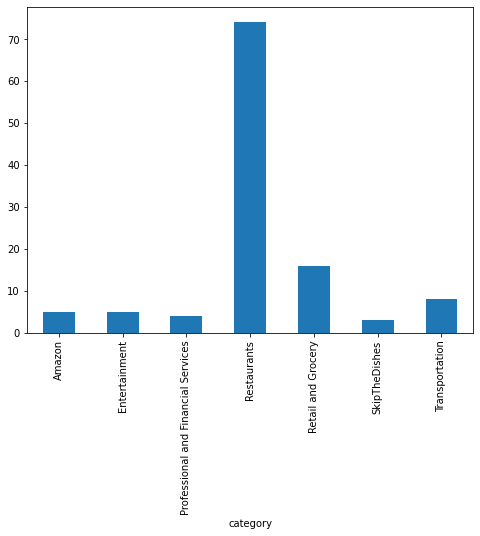

In [47]:

fig = plt.figure(figsize=(8,6))
df.groupby('category').name.count().plot.bar(ylim=0)
plt.show()

In [48]:
for i in (df.groupby('category')):
    print(i)
#print(df.groupby('category').name.count())


('Amazon',                           name category  category_id
13   Amazon.ca                   Amazon            4
16   Amazon *Marketplce CA       Amazon            4
80   Amazon *Marketplce CA       Amazon            4
105                     Amazon   Amazon            4
113                     amazon   Amazon            4)
('Entertainment',                           name       category  category_id
14   CINEPLEX 8030 WEB QPS      Entertainment            5
15   CINEPLEX 8030 WEB QPS      Entertainment            5
27   FAMOUS PLAYER 7428QPS      Entertainment            5
103                        PSN  Entertainment            5
104                PlayStation  Entertainment            5)
('Professional and Financial Services',                        name                             category  category_id
11                CASH ADV/  Professional and Financial Services            2
74   -050 CITY OF OTTAWA     Professional and Financial Services            2
106            Aujla Sa

In [49]:
#data cleaned model time 

#tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 7), stop_words='english')

#features = tfidf.fit_transform(df.name).toarray()
#features

In [51]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df['name'])
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['category_id'], test_size=0.2, random_state = 0)


In [53]:
 #count_vect = CountVectorizer()
#X_train_counts = count_vect.fit_transform(X_train)
#tfidf_transformer = TfidfTransformer()
#X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts).toarray()
clf = MultinomialNB().fit(X_train,y_train)#(X_train_tfidf, y_train) 


In [54]:
#testing
#print(clf.predict(count_vect.transform(["uber"])))

#X_test_counts = count_vect.fit_transform(X_test)
#X_test_tfidf = tfidf_transformer.fit_transform(X_train_tfidf)
result = clf.predict(y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[1 2 0 0 0 0 0 0 2 0 6 0 0 1 0 2 0 0 0 0 4 4 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [55]:
from sklearn import metrics
#tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words='english')
#tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
#X = tfidfconverter.fit_transform(X_train).toarray()
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)


In [56]:
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [58]:
y_pred = classifier.predict(X_test)

In [59]:
#X = tfidfconverter.fit_transform(X_test).toarray()

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[15  0  0  0  0]
 [ 0  2  0  0  0]
 [ 3  0  0  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0  1]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        15
           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         3
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1

    accuracy                           0.87        23
   macro avg       0.77      0.80      0.78        23
weighted avg       0.76      0.87      0.81        23

0.8695652173913043


c:\users\jasman singh sahi\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

AttributeError: 'numpy.ndarray' object has no attribute 'lower'

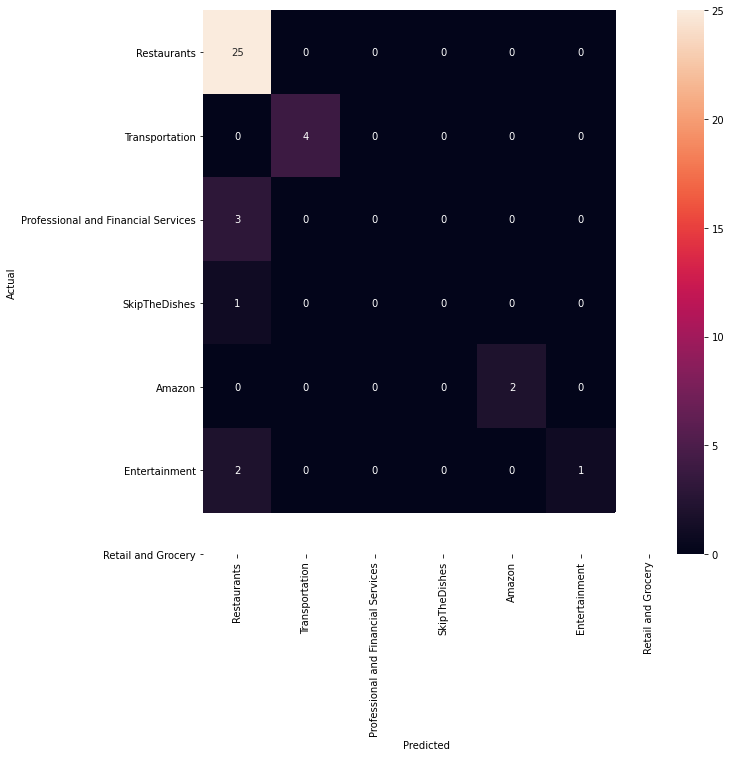

In [60]:

import seaborn as sns

model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.category.values, yticklabels=category_id_df.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
